In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(f"E:\Full Data Science Projects\Car Name Prediciton\Car Sales.xlsx - car_data.csv")
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [4]:
df = df.dropna()
round(df.describe(),0)

,Annual Income,Price ($),Phone
count,23905.0,23905.0,23905.0
mean,830847.0,28090.0,7497753.0
std,720021.0,14789.0,867508.0
min,10080.0,1200.0,6000101.0
25%,386000.0,18001.0,6746465.0
50%,735000.0,23000.0,7496199.0
75%,1176000.0,34000.0,8248172.0
max,11200000.0,85800.0,8999579.0


In [5]:
columns_except_company = [col for col in df.columns if col != 'Company']
new_columns_order = columns_except_company + ['Company']
df = df[new_columns_order]
df.rename(columns={'Company': 'Car_Name'}, inplace=True)
df.drop(['Car_id', 'Date', 'Customer Name', 'Dealer_Name', 'Color', 'Phone'], axis=1, inplace=True)
df.drop(df.columns[6], axis=1, inplace=True)
df.head()

,Gender,Annual Income,Model,Engine,Transmission,Price ($),Body Style,Dealer_Region,Car_Name
0,Male,13500,Expedition,DoubleÂ Overhead Camshaft,Auto,26000,SUV,Middletown,Ford
1,Male,1480000,Durango,DoubleÂ Overhead Camshaft,Auto,19000,SUV,Aurora,Dodge
2,Male,1035000,Eldorado,Overhead Camshaft,Manual,31500,Passenger,Greenville,Cadillac
3,Male,13500,Celica,Overhead Camshaft,Manual,14000,SUV,Pasco,Toyota
4,Male,1465000,TL,DoubleÂ Overhead Camshaft,Auto,24500,Hatchback,Janesville,Acura


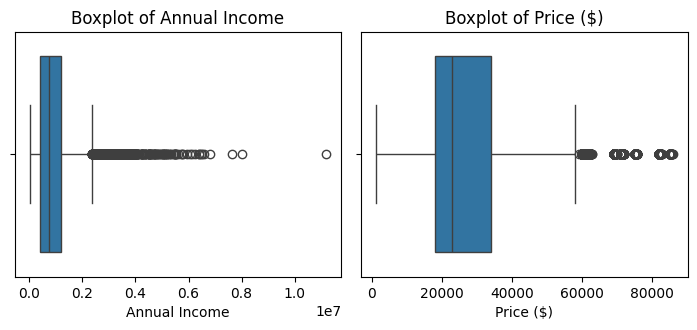

In [6]:
features = ['Annual Income', 'Price ($)']


plt.figure(figsize=(14, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)  # 2 rows, 3 columns
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [7]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.24)
    Q3 = df[feature].quantile(0.76)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5 * IQR) | (df[feature] > Q3 + 1.5 * IQR)]
    #df = df.drop(outliers.index)
    #df = df.reset_index(drop=True)
    return outliers

In [8]:
remove_outliers(df, 'Annual Income')

,Gender,Annual Income,Model,Engine,Transmission,Price ($),Body Style,Dealer_Region,Car_Name
21,Male,2500000,I30,DoubleÂ Overhead Camshaft,Auto,21000,Hardtop,Austin,Infiniti
48,Male,4060000,Altima,DoubleÂ Overhead Camshaft,Auto,20000,Hatchback,Austin,Nissan
89,Male,2550000,Bravada,DoubleÂ Overhead Camshaft,Auto,19000,Hatchback,Austin,Oldsmobile
122,Male,3000000,Eldorado,DoubleÂ Overhead Camshaft,Auto,31000,Passenger,Austin,Cadillac
125,Male,2800000,Sable,DoubleÂ Overhead Camshaft,Auto,26000,Sedan,Greenville,Mercury
...,...,...,...,...,...,...,...,...,...
23528,Male,3200000,Wrangler,DoubleÂ Overhead Camshaft,Auto,60000,Hatchback,Pasco,Jeep
23532,Male,3155000,SL,DoubleÂ Overhead Camshaft,Auto,20500,SUV,Middletown,Saturn
23666,Male,2800000,Prizm,Overhead Camshaft,Manual,21000,Hardtop,Austin,Chevrolet
23755,Male,2770000,Montero Sport,Overhead Camshaft,Manual,12000,Hardtop,Janesville,Mitsubishi


In [9]:
remove_outliers(df, 'Price ($)')

,Gender,Annual Income,Model,Engine,Transmission,Price ($),Body Style,Dealer_Region,Car_Name
8,Male,815000,Malibu,Overhead Camshaft,Manual,82000,Hardtop,Pasco,Chevrolet
108,Male,480000,Grand Marquis,Overhead Camshaft,Manual,71000,SUV,Middletown,Mercury
112,Male,1350000,Taurus,Overhead Camshaft,Manual,69001,SUV,Pasco,Ford
145,Male,13500,Taurus,Overhead Camshaft,Manual,69000,SUV,Austin,Ford
156,Female,13500,Aurora,Overhead Camshaft,Manual,71000,Passenger,Middletown,Oldsmobile
...,...,...,...,...,...,...,...,...,...
23796,Male,940000,Grand Marquis,Overhead Camshaft,Manual,71000,SUV,Greenville,Mercury
23809,Male,2065000,Continental,Overhead Camshaft,Manual,82500,Passenger,Aurora,Lincoln
23839,Female,555000,Catera,DoubleÂ Overhead Camshaft,Auto,75000,Hatchback,Janesville,Cadillac
23846,Female,925000,Aurora,Overhead Camshaft,Manual,71000,Passenger,Austin,Oldsmobile


## **I will not exclude outliers from the dataset as I do not classify them as such, and it is imperative for the model to assimilate and learn from the entirety of the data distribution**

In [10]:
from sklearn.preprocessing import LabelEncoder
input = df.iloc[:,:-1]
target = df.iloc[:,-1]
le_Gender = LabelEncoder()
le_Model = LabelEncoder()
le_Engine = LabelEncoder()
le_Transmission = LabelEncoder()
le_BS = LabelEncoder() 
le_region = LabelEncoder()
input['Gender'] = le_Gender.fit_transform(input['Gender'])
input['Model'] = le_Model.fit_transform(input['Model'])
input['Engine'] = le_Engine.fit_transform(input['Engine'])
input['Transmission'] = le_Transmission.fit_transform(input['Transmission'])
input['Body Style'] = le_BS.fit_transform(input['Body Style'])
input['Dealer_Region'] = le_region.fit_transform(input['Dealer_Region'])
input.head(10)

,Gender,Annual Income,Model,Engine,Transmission,Price ($),Body Style,Dealer_Region
0,1,13500,60,0,0,26000,3,4
1,1,1480000,52,0,0,19000,3,0
2,1,1035000,57,1,1,31500,2,2
3,1,13500,36,1,1,14000,3,5
4,1,1465000,141,0,0,24500,1,3
5,1,850000,51,1,1,12000,1,6
6,1,1600000,44,1,1,14000,2,1
7,1,13500,70,0,0,42000,2,1
8,1,815000,91,1,1,82000,0,5
9,0,13500,59,0,0,15000,2,6


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def find_best_n_estimators(X_train, y_train, max_estimators=80, cv=5):
    best_score = 0
    best_n_estimators = 0

    for n_estimators in range(50, max_estimators + 1):
        model = RandomForestClassifier(n_estimators=n_estimators)
        
        scores = cross_val_score(model, X_train, y_train, cv=cv)
        mean_score = scores.mean()
        
        if mean_score > best_score:
            best_score = mean_score
            best_n_estimators = n_estimators
    
    return best_n_estimators

best_n_estimators = find_best_n_estimators(X_train, y_train)
print("Best n_estimators:", best_n_estimators)

Best n_estimators: 75


In [40]:
n_estimators = best_n_estimators
model = RandomForestClassifier(n_estimators = n_estimators) 
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy:", round(accuracy * 100 , 0))

Accuracy: 97.0


In [37]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy * 100 )

Accuracy: 99.98605688789738


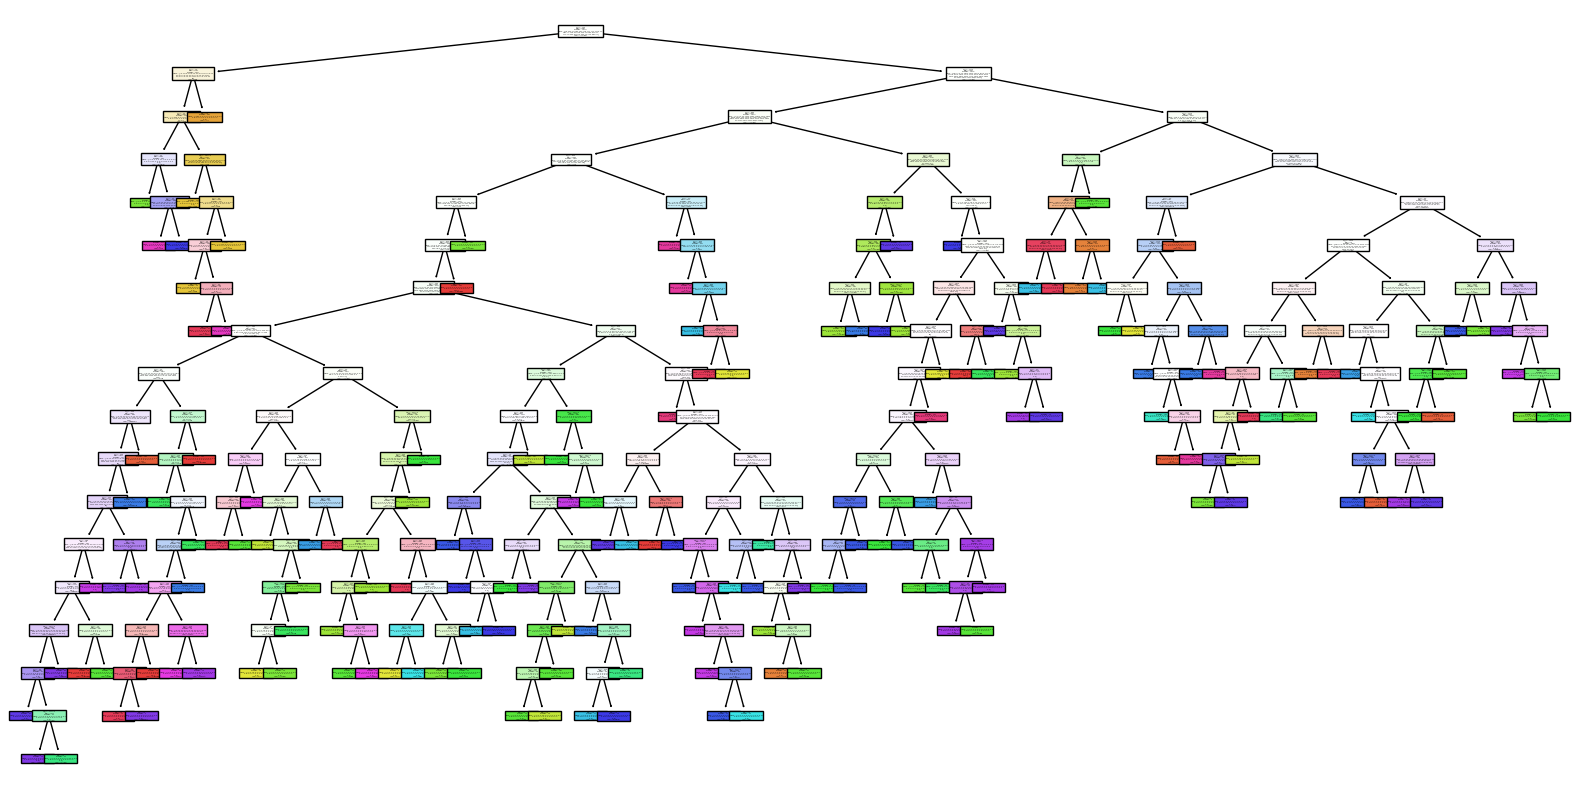

In [38]:
from sklearn.tree import plot_tree
unique_classes = np.unique(y_train)  
plt.figure(figsize=(20,10))
plot_tree(model, class_names = unique_classes, filled=True)
plt.show()